<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



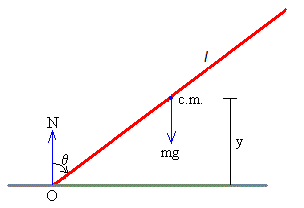


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa de la lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una lápiz de masa $m$ y longitud $l$ respecto a un eje perpendicular a la lápiz en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la siguiente ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

### Punto 1

In [275]:
#Punto 1

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

solvr = lambda X, t: [X[1], (((2*9.8/0.1)-(X[1]**2)*np.cos(X[0]))/(1/3+(np.sin(X[0]))**2))*np.sin(X[0])]
T = np.arange(0, 0.5, 0.01)
Y = np.array(odeint(solvr, [np.pi/12, 0], T))


piso = False
i=0

while not piso:
    if Y[i,0]> np.pi/2:
        piso=True
        Y = Y[:i:]
        T = T[:i:]
        break
    i+=1

Y = [Y[::,0:1:], Y[::,1:2:], 0.5*np.cos(Y[::,0:1:])] # Y[0] es la posición angular, Y[1] la velocidad angular y Y[2] la altura del centro de masa


### Punto 2

Text(0.5, 0, '$t\\ [s]$')

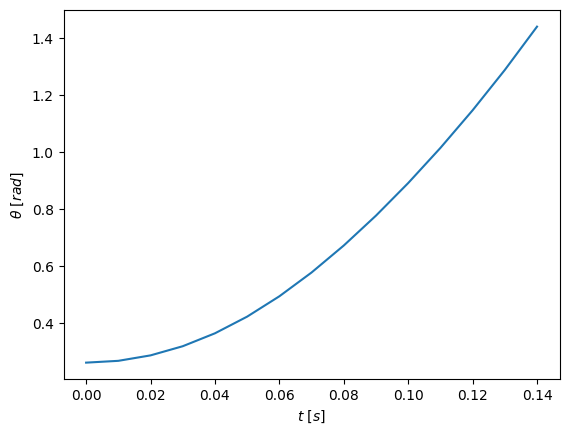

In [276]:
# Punto 2

plt.plot(T, Y[0])
plt.ylabel("$\\theta\ [rad]$")
plt.xlabel("$t\ [s]$")

Text(0.5, 0, '$t\\ [s]$')

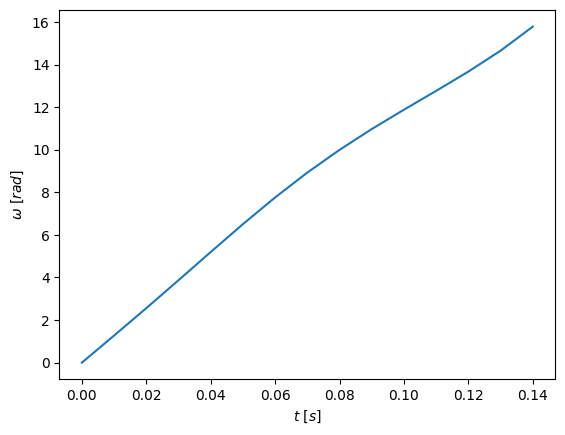

In [277]:
#Gráfico de la velocidad angular

plt.plot(T, Y[1])
plt.ylabel("$\\omega\ [rad]$")
plt.xlabel("$t\ [s]$")

Text(0.5, 0, '$t\\ [s]$')

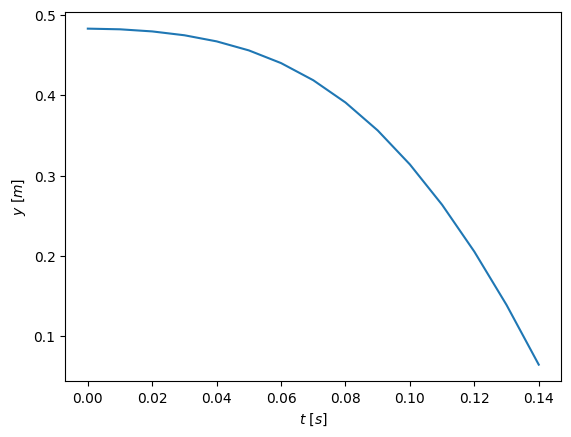

In [278]:
#Gráfico de la altura del centro de masa

plt.plot(T, Y[2])
plt.ylabel("$y\ [m]$")
plt.xlabel("$t\ [s]$")

### Punto 3
Al variar los valores del paso del tiempo, $\Delta t$, y observar las gráficas, parece que para valores de $\Delta t<0.5$, las gráficas obtenidas son razonables, y no cambian al disminuir el paso del tiempo, lo cual indica que, si $\Delta t<0.5$, la solución puede ser considerada válida. Sín embargo, ya que no estoy sesguro de que ésta condición siga carantizando precisión al variar el ángulo inicial $\theta_0$, en los puntos que siguen utilizaré un paso del tiempo bastante menor que $0.5$, para garantizar que los resultados obtenidos sean precisos.

### Punto 4

Text(0.5, 0, '$t\\ [s]$')

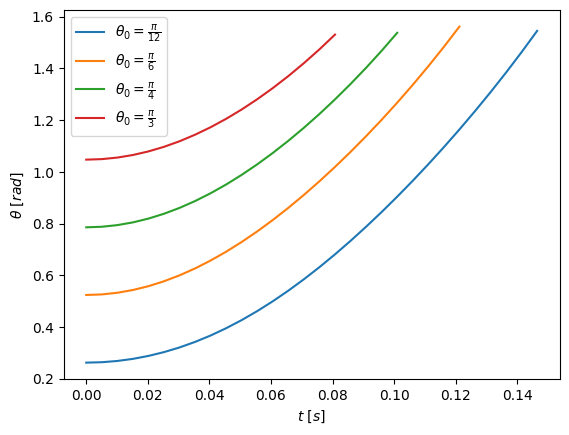

In [279]:
#Punto 4

T1 = np.linspace(0, 0.5, 100)
T2 = np.linspace(0, 0.5, 100)
T3 = np.linspace(0, 0.5, 100)
T4 = np.linspace(0, 0.5, 100)

Y1 = np.array(odeint(solvr, [np.pi/12, 0], T1))
Y2 = np.array(odeint(solvr, [np.pi/6, 0], T2))
Y3 = np.array(odeint(solvr, [np.pi/4, 0], T3))
Y4 = np.array(odeint(solvr, [np.pi/3, 0], T4))

piso = [False]*4
i=0

while False in piso:
    if Y1[i,0]>np.pi/2 and not piso[0]:
        piso[0]=True
        Y1 = Y1[:i:]
        T1 = T1[:i:]
    if not piso[1]:
        if Y2[i,0]>np.pi/2:
            piso[1]=True
            Y2 = Y2[:i:]
            T2 = T2[:i:]
    if not piso[2]:
        if Y3[i,0]>np.pi/2:
            piso[2]=True
            Y3 = Y3[:i:]
            T3 = T3[:i:]
    if not piso[3]:
        if Y4[i,0]>np.pi/2:
            piso[3]=True
            Y4 = Y4[:i:]
            T4 = T4[:i:]
    i+=1

plt.plot(T1, Y1[::,0:1:], label="$\\theta_0=\\frac{\pi}{12}$")
plt.plot(T2, Y2[::,0:1:], label="$\\theta_0=\\frac{\pi}{6}$")
plt.plot(T3, Y3[::,0:1:], label="$\\theta_0=\\frac{\pi}{4}$")
plt.plot(T4, Y4[::,0:1:], label="$\\theta_0=\\frac{\pi}{3}$")
plt.legend()


plt.ylabel("$\\theta\ [rad]$")
plt.xlabel("$t\ [s]$")

### Punto 5

In [280]:
# Punto 5

from scipy.interpolate import lagrange


P1 = lagrange(T1[20:], Y1[20::, 0]-np.pi/2)
P2 = lagrange(T2[15:], Y2[15::, 0])
P3 = lagrange(T3[11:], Y3[11::, 0])
P4 = lagrange(T4[7:], Y4[7::, 0])

R1 =np.roots(P1)
R2 =np.roots(P2)
R3 =np.roots(P3)
R4 =np.roots(P4)

#Seleccionando las raíces reales
R1 = R1.real
R2 = R2.real
R3 = R3.real
R4 = R4.real


#Comparando con los últimos valores de los arreglos T para encontrar la raíz apropiada:

R1 = R1[np.argmin(abs(R1-T1[-1]))]
R2 = R2[np.argmin(abs(R2-T2[-1]))]
R3 = R3[np.argmin(abs(R3-T3[-1]))]
R4 = R4[np.argmin(abs(R4-T4[-1]))]

print(R1)
print(R2)
print(R3)
print(R4)

0.14798208299275054
0.14285311382454563
0.12244824864840459
0.10010301725648368


### Punto 6

In [281]:
# Punto 6
from scipy import integrate

I = lambda thet, thet0: 0.5*np.sqrt(0.1/9.8)*np.sqrt((1/3 + np.sin(thet)**2)/(np.cos(thet0)-np.cos(thet))) # Función a integrar

print(f"Error en theta_0 = pi/12: {abs(R1-integrate.quad(lambda x: I(x, np.pi/12), np.pi/12, np.pi/2)[0])}")
print(f"Error en theta_0 = pi/6: {abs(R2-integrate.quad(lambda x: I(x, np.pi/6), np.pi/6, np.pi/2)[0])}")
print(f"Error en theta_0 = pi/4: {abs(R3-integrate.quad(lambda x: I(x, np.pi/4), np.pi/4, np.pi/2)[0])}")
print(f"Error en theta_0 = pi/3: {abs(R4-integrate.quad(lambda x: I(x, np.pi/3), np.pi/3, np.pi/2)[0])}")



Error en theta_0 = pi/12: 1.1524424627373797e-06
Error en theta_0 = pi/6: 0.02107433896273203
Error en theta_0 = pi/4: 0.01912700400755621
Error en theta_0 = pi/3: 0.01594296684870232


### Punto 7

Text(0.5, 0, '$\\theta_0\\ [rad]$')

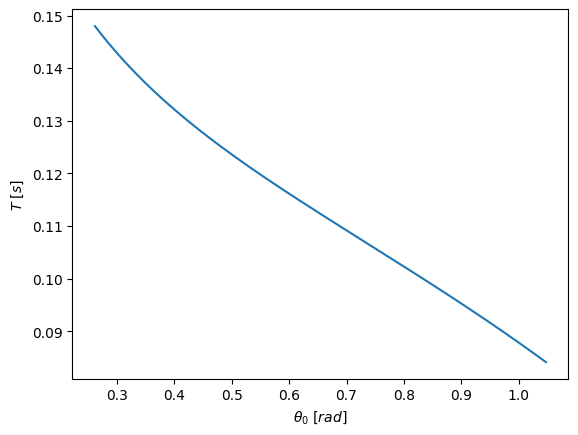

In [282]:
# Punto 7

Thet = np.linspace(np.pi/12, np.pi/3, 1000)

F = lambda thet: integrate.quad(lambda x: I(x, thet), thet, np.pi/2)[0]

Y = [F(t) for t in Thet]

plt.plot(Thet, Y)
plt.ylabel("$T\ [s]$")
plt.xlabel("$\\theta_0\ [rad]$")


Parece ser que el tiempo $T$ requerido para que el lápiz caiga en el piso disminuye de forma aproximadamente lineal a medida que disminuye el ángulo inicial $\theta_0$